In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from catboost import CatBoostRegressor
from sklearn import metrics

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
plt.rcParams["figure.figsize"] = (20,3)

In [4]:
items = pd.read_csv('data/items.csv')
shops = pd.read_csv('data/shops.csv')
cats = pd.read_csv('data/item_categories.csv')
train = pd.read_csv('data/sales_train.csv')
# set index to ID to avoid droping it later
test  = pd.read_csv('data/test.csv').set_index('ID')

In [5]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [6]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [7]:
cats

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


In [8]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [9]:
train[train['item_cnt_day']<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


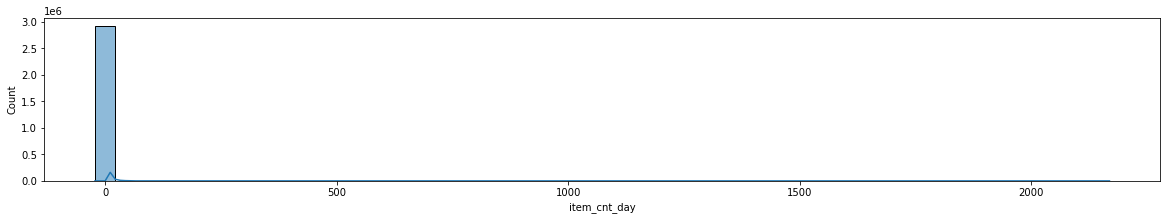

In [10]:
sns.histplot(train['item_cnt_day'],kde=True, bins=50);

In [11]:
train['item_cnt_day'].value_counts(normalize=True)*100

 1.0       89.560873
 2.0        6.614816
 3.0        1.612821
 4.0        0.670505
 5.0        0.356762
-1.0        0.247015
 6.0        0.215883
 7.0        0.138188
 8.0        0.098881
 9.0        0.074152
 10.0       0.061992
 11.0       0.043020
 12.0       0.036889
 13.0       0.031269
 14.0       0.024388
 15.0       0.021731
 16.0       0.018530
 17.0       0.014919
 18.0       0.013318
 20.0       0.012398
 19.0       0.011819
 21.0       0.009878
 22.0       0.008243
 24.0       0.006949
 23.0       0.006744
 25.0       0.006131
 26.0       0.005995
 30.0       0.005007
 28.0       0.004462
 27.0       0.004428
 31.0       0.004190
 32.0       0.003611
 29.0       0.003474
 33.0       0.002793
 34.0       0.002759
-2.0        0.002657
 35.0       0.002350
 36.0       0.002112
 37.0       0.002078
 41.0       0.001976
 40.0       0.001976
 38.0       0.001839
 39.0       0.001771
 44.0       0.001362
 46.0       0.001328
 42.0       0.001226
 43.0       0.001158
 50.0       0

In [12]:
train[train['item_cnt_day']<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [13]:
train[train['item_price']<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [14]:
train['date']

0          02.01.2013
1          03.01.2013
2          05.01.2013
3          06.01.2013
4          15.01.2013
              ...    
2935844    10.10.2015
2935845    09.10.2015
2935846    14.10.2015
2935847    22.10.2015
2935848    03.10.2015
Name: date, Length: 2935849, dtype: object

In [15]:
train['date'] = pd.to_datetime(train['date'],format = '%d.%m.%Y')

In [16]:
random_item = np.random.choice(train['item_id'])
ts = train[train['item_id']==random_item].groupby('date')['item_cnt_day'].sum().resample('1d').sum().fillna(0)

In [17]:
random_item

17315

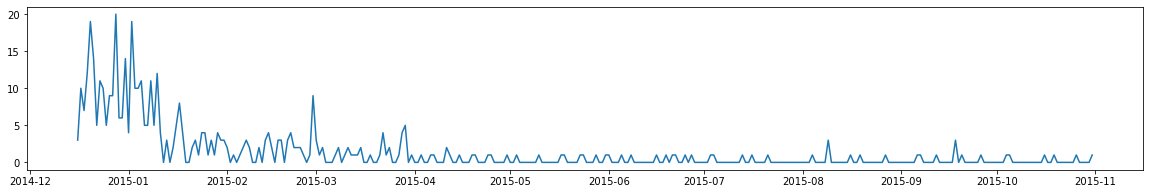

In [18]:
plt.plot(ts)

In [19]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [20]:
train.groupby(['item_id','date_block_num'])['item_cnt_day'].sum().sort_values(ascending=False)

item_id  date_block_num
20949    11                12557.0
         23                12185.0
         10                 8537.0
         5                  8424.0
         8                  7945.0
                            ...   
2331     14                   -3.0
11367    19                   -5.0
1590     0                   -12.0
2331     13                  -18.0
8023     10                  -22.0
Name: item_cnt_day, Length: 233912, dtype: float64

In [21]:
items[items['item_id']==20949]

,item_name,item_id,item_category_id
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


In [22]:
train.groupby(['item_id','date_block_num'])['item_cnt_day'].sum().groupby('item_id').mean().sort_values(ascending=False).iloc[:20]

item_id
20949    6052.967742
3731     1442.714286
10201    1334.000000
3351     1010.500000
9242      912.000000
10202     899.000000
10210     812.666667
7223      798.000000
10209     702.166667
1583      660.000000
3732      640.076923
3730      622.000000
2814      592.083333
6502      582.333333
3733      542.166667
4719      534.500000
2808      507.205882
7224      504.000000
3352      498.500000
9241      497.000000
Name: item_cnt_day, dtype: float64

In [23]:
items[items['item_id']==3731]

,item_name,item_id,item_category_id
3731,"Grand Theft Auto V [PC, русские субтитры]",3731,30


In [24]:
shop_month_cnts = train.groupby(['shop_id','date_block_num'])['item_cnt_day'].sum().reset_index()

In [25]:
shop_cnts = shop_month_cnts.groupby('shop_id').size()

In [26]:
shop_cnts.value_counts()

34    32
2      3
33     3
4      3
20     3
32     3
1      2
11     1
28     1
23     1
19     1
25     1
7      1
16     1
9      1
26     1
29     1
30     1
dtype: int64

In [27]:
shops_of_interest = shop_cnts[shop_cnts==34].index

In [28]:
shop_month_cnts = shop_month_cnts[shop_month_cnts['shop_id'].isin(shops_of_interest)]

In [29]:
shop_month_cnts['target'] = shop_month_cnts.groupby('shop_id')['item_cnt_day'].shift(-1)

In [30]:
shop_month_cnts

,shop_id,date_block_num,item_cnt_day,target
4,2,0,1146.0,488.0
5,2,1,488.0,753.0
6,2,2,753.0,583.0
7,2,3,583.0,553.0
8,2,4,553.0,832.0
...,...,...,...,...
1581,59,29,913.0,992.0
1582,59,30,992.0,1214.0
1583,59,31,1214.0,914.0
1584,59,32,914.0,790.0


In [31]:
shop_month_cnts.dropna(inplace = True)

In [32]:
train_sales = shop_month_cnts[shop_month_cnts['date_block_num']<32]
test_sales = shop_month_cnts[shop_month_cnts['date_block_num']==32]

In [33]:
cb_reg = CatBoostRegressor(n_estimators = 300)
cb_reg.fit(train_sales.drop(['date_block_num','target'],axis=1), train_sales['target'],cat_features = ['shop_id'], verbose=False, eval_set = (test_sales.drop(['date_block_num','target'],axis=1), test_sales['target']))

C:\ProgramData\Anaconda3\lib\site-packages\catboost\core.py:966: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names, thread_count)


In [34]:
cb_reg.predict(test_sales.drop('target',axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\catboost\core.py:966: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names, thread_count)


array([ 851.41805732,  806.61840631,  862.78821049, 1887.63044262,
       1395.57442359, 4139.26393207, 1143.253567  , 1358.0468235 ,
       1187.37732328, 1466.52309954, 1274.42178878, 1977.36343867,
       1476.44794039, 1616.34018221, 5917.86319507, 1635.45945918,
       3123.56055361, 6222.78974737, 1608.68077619, 1042.10283121,
       1306.27434777,  892.51739539, 4243.95565331,  908.46741509,
        794.94559437, 1361.45205058, 2006.22962645, 1124.29815436,
       1126.3698877 , 1317.09156563, 1294.32473212,  983.13539749])

In [35]:
y_preds = cb_reg.predict(test_sales.drop('target',axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\catboost\core.py:966: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names, thread_count)


In [36]:
test_sales['target'].mean(),test_sales['target'].median()

(1705.5, 1219.5)

In [37]:
metrics.mean_absolute_error(test_sales['target'], y_preds)

167.54927750620698

In [38]:
metrics.mean_absolute_error(test_sales['target'], test_sales['item_cnt_day'])

161.375

In [39]:
mean_prices = train[train['shop_id'].isin(shops_of_interest)].groupby(['shop_id','date_block_num'])['item_price'].mean().reset_index()

In [40]:
train_sales = train_sales.merge(mean_prices, on=['shop_id','date_block_num'])
test_sales = test_sales.merge(mean_prices, on=['shop_id','date_block_num'])

In [44]:
cb_reg = CatBoostRegressor(n_estimators = 300)
cb_reg.fit(train_sales.drop(['date_block_num','target'],axis=1), train_sales['target'],cat_features = ['shop_id'], verbose=False, eval_set = (test_sales.drop(['date_block_num','target'],axis=1), test_sales['target']))

C:\ProgramData\Anaconda3\lib\site-packages\catboost\core.py:966: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names, thread_count)


In [45]:
y_preds = cb_reg.predict(test_sales.drop('target',axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\catboost\core.py:966: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names, thread_count)


In [46]:
metrics.mean_absolute_error(test_sales['target'], y_preds)

178.62411593431773